# Introduction a PyTorch

Based on https://github.com/mila-udem/welcome_tutorials/tree/master/pytorch By Sandeep Subramanian, https://github.com/jcjohnson/pytorch-examples by Justin Johnson and official documentation http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html .

## Tensor

Tensors are similar to numpy array, but they can also be used on GPUs.

In [86]:
import torch
import numpy as np
from torch.autograd import Variable
# convert numpy array to tensor
torch.from_numpy(np.array([1,2,3,4]))  # LongTensor

tensor([1, 2, 3, 4])

In [87]:
torch.from_numpy(np.array([1.,2,3,4]))  # Double Tensor

tensor([1., 2., 3., 4.], dtype=torch.float64)

In [88]:
torch.FloatTensor([1,2,3,4])
torch.Tensor([1,2,3,4])  # float tensor by default, can change it with torch.set_default_tensor_type('torch.FloatTensor')

tensor([1., 2., 3., 4.])

In [89]:
x = torch.Tensor([1,2,3,4])
# HI

In [90]:
x.sqrt()  # similar functionality as numpy

tensor([1.0000, 1.4142, 1.7321, 2.0000])

In [91]:
x = x.view(-1, 1)  # the torch reshape function
print(x.size())

torch.Size([4, 1])


In [97]:
torch.cat([x, x], 1)  # concatenate 2 vectors

tensor([[1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.]])

## Autograd

Autograd provides automatic differentiation on all operations perform on tensors. To be able to use Autograd, you must wrap your tensors in a Variable.

In [101]:
x = Variable(x, requires_grad=False)
w = Variable(torch.ones(4, 1), requires_grad=True)
w

tensor([[1.],
        [1.],
        [1.],
        [1.]], requires_grad=True)

In [102]:
print(w.grad)

None


In [103]:
z = torch.dot(w, x)
print(z)

RuntimeError: dot: Expected 1-D argument self, but got 2-D

## Optim and loss function

In [104]:
optimizer = torch.optim.SGD([w], lr=0.01)

In [105]:
optimizer.zero_grad()
z.backward()
print(w.grad)
optimizer.step()

NameError: name 'z' is not defined

In [13]:
print(w)

Variable containing:
 0.9900
 0.9800
 0.9700
 0.9600
[torch.FloatTensor of size 4x1]



In [106]:
loss_fn = torch.nn.MSELoss()
z = torch.dot(w, x)
target = Variable(torch.zeros(1))
optimizer.zero_grad()
loss = loss_fn(z, target)
loss.backward()  # retain_graph=True, if you need to call loss.backward() again without optimizer.step()
optimizer.step()
print(w)

RuntimeError: dot: Expected 1-D argument self, but got 2-D

# Fashion MNIST

based on MNIST tutorial: https://github.com/pytorch/examples/blob/master/mnist/main.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torchvision
import torch.nn.functional as F
from fashion import FashionMNIST
import torchvision.transforms as transforms
from torch import nn
from torch import optim
# torch.cuda.init()
# torch.set_grad_enabled(True)

In [4]:
train_data = FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

valid_data = FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

In [5]:
train_idx = np.random.choice(train_data.train_data.shape[0], 54000, replace=False)

In [6]:
train_data.train_data = train_data.train_data[train_idx, :]
train_data.train_labels = train_data.train_labels[torch.from_numpy(train_idx).type(torch.LongTensor)]

In [7]:
mask = np.ones(60000)
mask[train_idx] = 0

In [8]:
valid_data.train_data = valid_data.train_data[torch.from_numpy(np.argwhere(mask)), :].squeeze()
valid_data.train_labels = valid_data.train_labels[torch.from_numpy(mask).type(torch.ByteTensor)]

In [9]:
batch_size = 100
test_batch_size = 100

train_loader = torch.utils.data.DataLoader(train_data,
    batch_size=batch_size, shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data,
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)


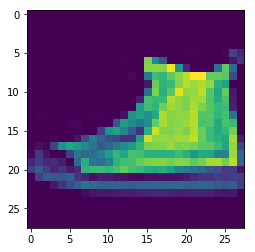

In [10]:
plt.imshow(train_loader.dataset.train_data[1].numpy())

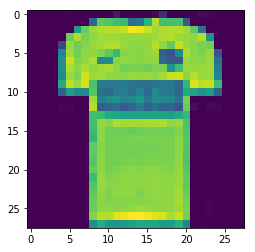

In [11]:
plt.imshow(train_loader.dataset.train_data[10].numpy())

In [111]:
class FcNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, image):
        batch_size = image.size()[0]


        x = image.view(batch_size, -1)
        x = torch.sigmoid(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x    


In [113]:
def outputSize(in_size, kernel_size, stride, padding):

    output = int((in_size - kernel_size + 2*(padding)) / stride) + 1

    return(output)

print(outputSize([32,28,28],5,1,2))



TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
# Convolutional N dual layers
class CNNetworkMultiLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 256, 8192)
        self.fc2 = nn.Linear(6072, 2024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 10)


        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(-1, 64 * 7 * 7)
        out = self.drop_out(out)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        
        return F.log_softmax(self.fc4(out), dim=1)



In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
#         data, target = Variable(data, requires_grad=False).cuda(), Variable(target).cuda() # if you have access to a gpu
#         with torch.no_grad():
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)  # calls the forward function
        loss = F.nll_loss(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    return model, train_loss/len(train_loader.dataset) * 100


def valid(model, valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    for data, target in valid_loader:
#         data, target = Variable(data, requires_grad=False).cuda(), Variable(target).cuda() # if you have access to a gpu

        data, target = Variable(data, requires_grad=False), Variable(target)
        output = model(data)
        valid_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    valid_loss /= len(valid_loader.dataset)
    print('\n' + "valid" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        valid_loss, correct, len(valid_loader.dataset),
        100. * correct / len(valid_loader.dataset)))
    
    return 100. * correct / len(valid_loader.dataset), valid_loss

    
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
#         data, target = Variable(data, requires_grad=False).cuda(), Variable(target).cuda() # if you have access to a gpu
#         with torch.no_grad():
        data, target = Variable(data, requires_grad=False), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\n' + "test" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    
def experiment(model, epochs=6, lr=0.001):
    best_precision = 0
    losses_train = []
    losses_validation = []
#     best_model = FcNetwork().to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, epochs + 1):
        model, train_loss = train(model, train_loader, optimizer)
        precision, validation_loss = valid(model, valid_loader)
        losses_train.append(train_loss)
        losses_validation.append(validation_loss)
        if precision > best_precision:
            best_precision = precision
            best_model = model
            
   
    plt.plot(losses_train, 'blue', label="Train")
    plt.plot(losses_validation, 'orange', label="Validation")
    plt.ylabel('Average negative log likelihood')
    plt.xlabel('Epochs')
    plt.show()
    
    return best_model, best_precision



    

In [ ]:
best_precision = 0
# device = torch.device("cpu")
# best_model = FcNetwork().to(device)


for model in [CNNetworkMultiLayer()]:  # add your models in the list
#     model.cuda()  # if you have access to a gpu
    model, precision = experiment(model)
    if precision > best_precision:
        best_precision = precision
        best_model = model

test(best_model, test_loader)